In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Assignment

For this assignment, you are going to apply statistical inference on [Titanic dataset](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv).


Try to answer the following questions. Include a hypothesis and the test assumptions. **If the assumptions are valid**, try to conduct the t-test and addditionally calculate manually the 95% confidence interval which is derived from the hypothesis that you try to evaluate. Also try to come up with some valid findings from the data.



1. Is it true that the younger a passenger was, had he more chances of survival? Is this difference statistically important? 
2. Is there a correlation between fare price and survival? Again, is this difference statistically important?

As you are conducting the analysis, consider what other variables may be accounting for any significant differences you find. 

##### More specifically, the tasks that you need to enounter in your deliverables are:

1. Familiarize yourself with the dataset. Review the structure of it and focus on the fields necessary to answer the above mentioned questions.

2. State the null and the alternative hypotheses that address the questions.

3. Manipulate the dataset accordingly in order to prepare it for the statistical tests.

4. Perform an exploratory analysis with summary statistics and corresponding visualizations, in order to gain a clearer view about the distributions of the samples. Focus on their differences.

5. Perform the necessary normality checks in order to make sure that you can conduct the statistical tests.

6. Apply t-test statistic if you pass successfully the normality checks

7. For this exercise, you will also need to write a function to calculate the confidence interval using the standard error for comparing two means (used in t-statistic):

$$
    \bar{X_1} - \bar{X_2} \pm z*\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}
$$

- $z$ is the critical value
- $s_1$ sample 1 standard deviation
- $s_2$ sample 2 standard deviation

- Let $z=1.96$ for a 95% confidence level

- Use the following method signature:

    `def get_95_ci(data1, data2)`
    

8. Elaborate on the results of your analyses.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

titanic = pd.read_csv("titanic.csv")

<IPython.core.display.Javascript object>

In [18]:
survived = titanic[titanic["Survived"] == 1]
dead = titanic[titanic["Survived"] == 0]

<IPython.core.display.Javascript object>

In [28]:
s_age = survived["Age"].dropna()
d_age = dead["Age"].dropna()

<IPython.core.display.Javascript object>

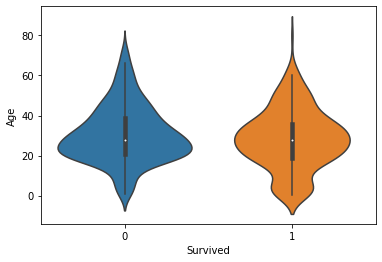

<IPython.core.display.Javascript object>

In [29]:
sns.violinplot(x="Survived", y="Age", data=titanic)

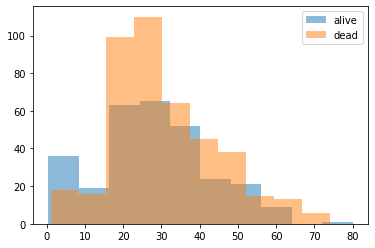

<IPython.core.display.Javascript object>

In [15]:
plt.hist(s_age, alpha=0.5, label="alive")
plt.hist(d_age, alpha=0.5, label="dead")
plt.legend()
plt.show()

In [31]:
stats.describe(s_age)

DescribeResult(nobs=290, minmax=(0.42, 80.0), mean=28.343689655172415, variance=223.53096523207253, skewness=0.17952298982985943, kurtosis=-0.07723188107788648)

<IPython.core.display.Javascript object>

In [32]:
stats.describe(d_age)

DescribeResult(nobs=424, minmax=(1.0, 74.0), mean=30.62617924528302, variance=200.84869836968645, skewness=0.5835101027554267, kurtosis=0.2652058747777071)

<IPython.core.display.Javascript object>

In [34]:
t, p = stats.ttest_ind(s_age, d_age)

<IPython.core.display.Javascript object>

In [35]:
p < 0.05

True

<IPython.core.display.Javascript object>

In [36]:
def get_95_ci(x1, x2):
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)
    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return (ci_lo, ci_hi)

<IPython.core.display.Javascript object>

In [37]:
get_95_ci(s_age, d_age)

(-4.469006585637352, -0.0959725945838561)

<IPython.core.display.Javascript object>

We can say with confidence that the younger you are, the more likely you will survive, however that difference could be as little as one month

In [22]:
s_fare = survived["Fare"]
d_fare = dead["Fare"]

<IPython.core.display.Javascript object>

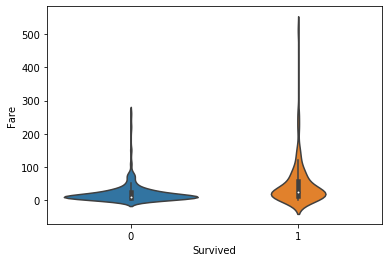

<IPython.core.display.Javascript object>

In [23]:
sns.violinplot(x="Survived", y="Fare", data=titanic)

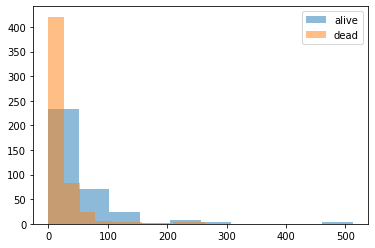

<IPython.core.display.Javascript object>

In [24]:
plt.hist(s_fare, alpha=0.5, label="alive")
plt.hist(d_fare, alpha=0.5, label="dead")
plt.legend()
plt.show()

In [25]:
stats.describe(survived["Fare"])

DescribeResult(nobs=342, minmax=(0.0, 512.3292), mean=48.39540760233918, variance=4435.160158368154, skewness=3.8458166819167294, kurtosis=20.343694359915972)

<IPython.core.display.Javascript object>

The distributions are way too far away from normal to run the analysis.

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>

Male vs Female could play a significant role in survival rate. Also, cabin location could play a large role in whether or not one survived.

Cabin
A10    0.0
A14    0.0
A16    1.0
A19    0.0
A20    1.0
      ... 
F33    1.0
F38    0.0
F4     1.0
G6     0.5
T      0.0
Name: Survived, Length: 147, dtype: float64

<IPython.core.display.Javascript object>

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<IPython.core.display.Javascript object>